In [2]:
#introduction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
diamonds= pd.read_csv("c:\\Users\\hoan\\Downloads\\diamonds.csv")

In [3]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True, categories = ordinal_var_dict[var])

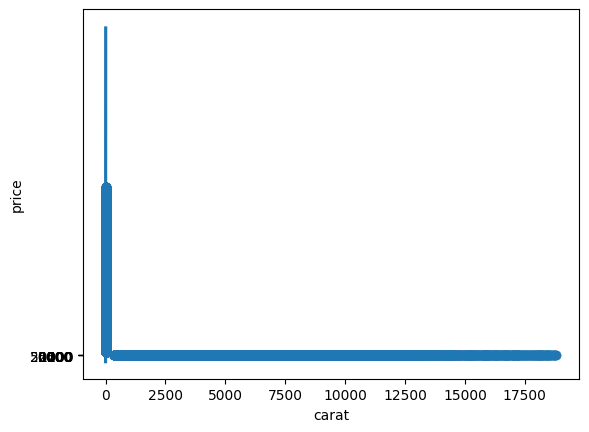

In [4]:
# bivariate plot of price vs. carat
plt.scatter(data = diamonds, x ='price', y = 'carat', alpha = 1/8)
plt.xlabel('price')
plt.ylabel('carat')

def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sns.regplot(x='carat', y='price', data=diamonds)
tick_locs = [100, 200, 500, 1000, 2000, 5000, 20000, 50000]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.show()